Load the `ISLR2` and `tidyverse` packages.

In [1]:
library(ISLR2)
library(tidyverse)



Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


`glimpse` the `Auto` dataset (this comes from the `ISLR2` package).

In [2]:
glimpse(Auto)



Rows: 392
Columns: 9
$ mpg          <dbl> 18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 2…
$ cylinders    <int> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 6, 6, 4, …
$ displacement <dbl> 307, 350, 318, 304, 302, 429, 454, 440, 455, 390, 383, 34…
$ horsepower   <int> 130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 16…
$ weight       <int> 3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 385…
$ acceleration <dbl> 12.0, 11.5, 11.0, 12.0, 10.5, 10.0, 9.0, 8.5, 10.0, 8.5, …
$ year         <int> 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7…
$ origin       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, …
$ name         <fct> chevrolet chevelle malibu, buick skylark 320, plymouth sa…


Plot `mpg`  as a function of `displacement`.

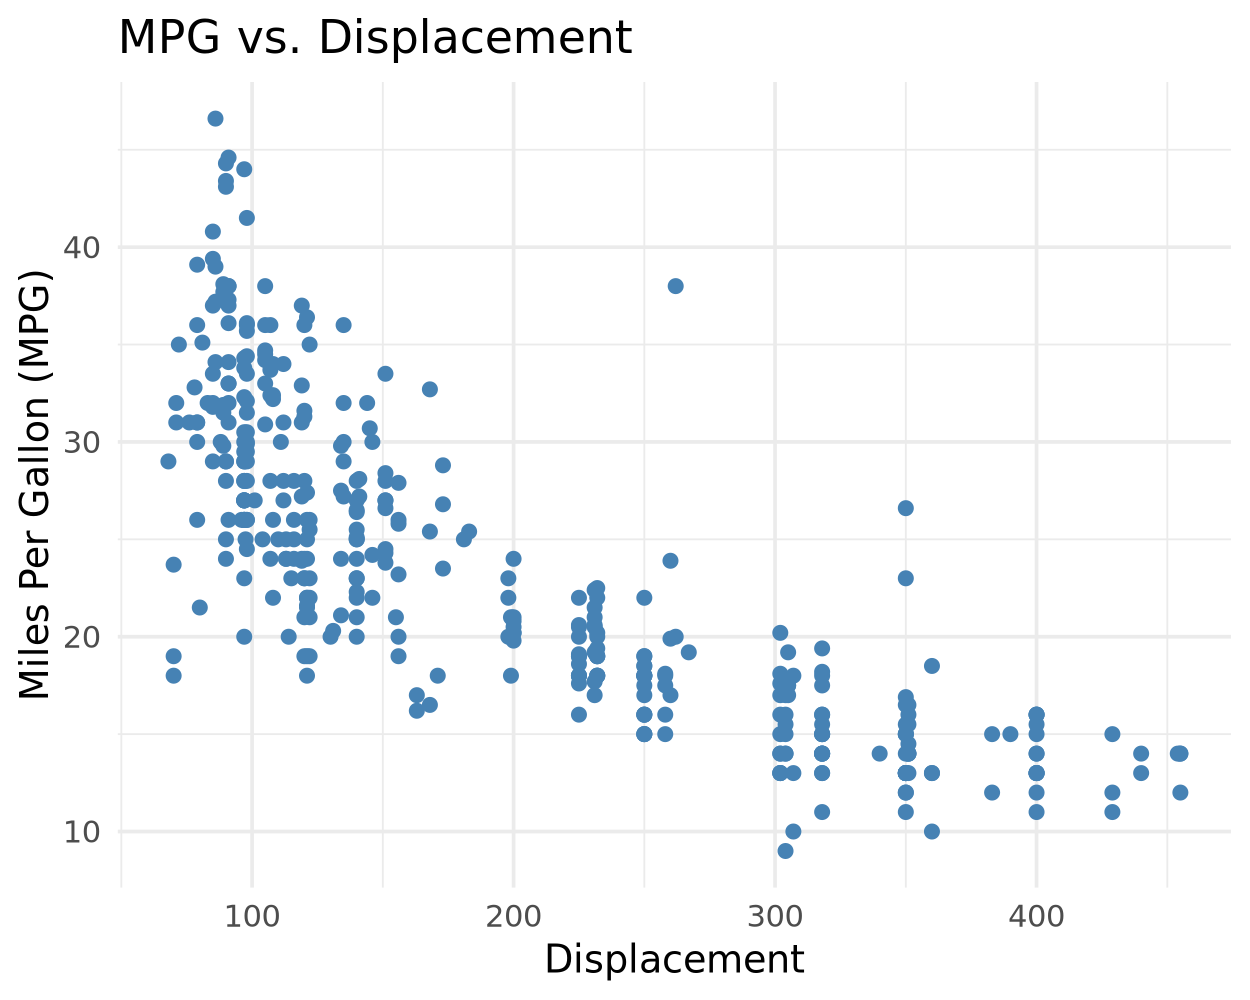

In [5]:
library(ISLR2)
library(tidyverse)

ggplot(Auto, aes(x = displacement, y = mpg)) +
  geom_point(color = "steelblue") +
  labs(
    title = "MPG vs. Displacement",
    x = "Displacement",
    y = "Miles Per Gallon (MPG)"
  ) +
  theme_minimal()

❓Does the relationship of `mpg` to `displacement` look linear?

No, it looks to be negatively curved.



Model `mpg` as a function of `displacement` and `cylinders`. 

- Transform the `displacement` variable using a `spline` or `polynomial` transform. (Hint: use `step_ns` or `step_poly`).
- Combine `step_mutate(cyl_cat = factor(cylinders))` followed by `step_dummy(cyl_cat)` and `step_rm(cylinders)` to convert `cylinders` to categorical data for the model.

Assuming you name your fitted model `mod_fit` the code below can be used to visualize your model:

```r
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
```

**Create and visualize your model below...**

── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.8     ✔ rsample      1.3.0
✔ dials        1.4.0     ✔ tune         1.3.0
✔ infer        1.0.8     ✔ workflows    1.2.0
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.3.1     ✔ yardstick    1.3.2
✔ recipes      1.3.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()



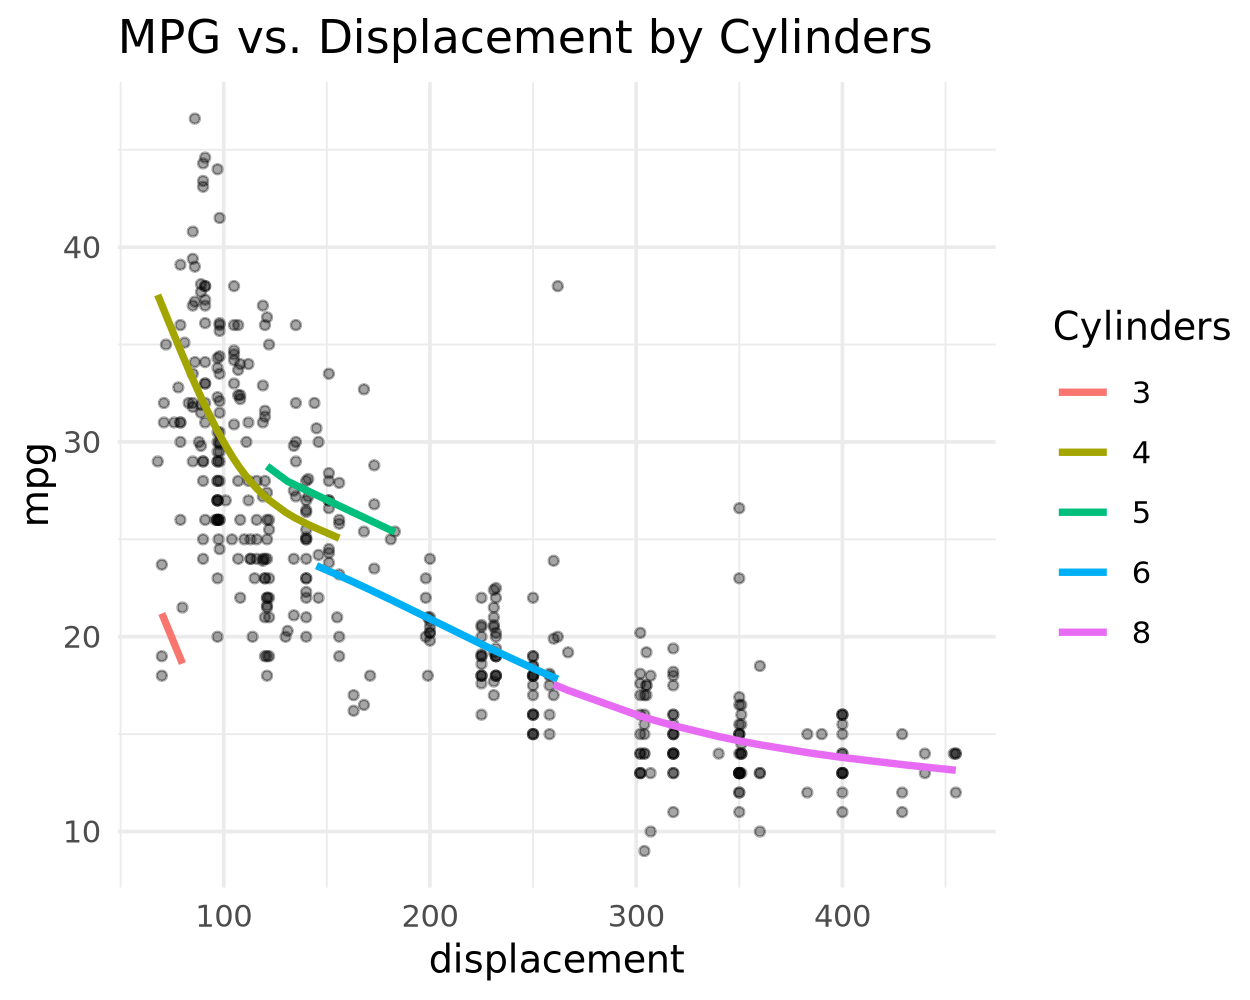

In [6]:
library(ISLR2)
library(tidyverse)
library(tidymodels)

# Load the data
data(Auto)

# Recipe with spline transformation and categorical treatment of cylinders
rec <- recipe(mpg ~ displacement + cylinders, data = Auto) |>
  step_ns(displacement, deg_free = 4) |>  # You could also use step_poly(..., degree = 2)
  step_mutate(cyl_cat = factor(cylinders)) |>
  step_dummy(cyl_cat) |>
  step_rm(cylinders)

# Prep the recipe and check the transformed data
rec <- prep(rec)

# Fit a linear model
mod_fit <- linear_reg() |> 
  set_engine("lm") |> 
  fit(mpg ~ ., data = juice(rec))  # use the processed training data

# Predict and visualize
predict(mod_fit, juice(rec)) |>
  bind_cols(Auto) |>
  ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1) +
    labs(
      title = "MPG vs. Displacement by Cylinders",
      color = "Cylinders"
    ) +
    theme_minimal()